In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from time import strftime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('raw.csv')
df.head(10)

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada
5,U10000,01/10/2019,15/10/2019,0,16,Canada
6,U10001,01/10/2019,01/10/2019,1,134,Canada
7,U10001,01/10/2019,02/10/2019,2,60,Canada
8,U10001,01/10/2019,03/10/2019,0,55,Canada
9,U10001,01/10/2019,04/10/2019,1,77,Canada


# EDA

To visualize how old was the user on that day he visited our app, we define Seniority column.
we add 1 to it because it makes it more readable, in the sense that seniority 10 means the 
user was on his/her 10th day since signup

In [3]:
df.signup_date = pd.to_datetime(df.signup_date, format='%d/%m/%Y')
df.ref_date = pd.to_datetime(df.ref_date, format='%d/%m/%Y')

df['seniority'] = (df['ref_date'] - df['signup_date']).dt.days + 1
df.head(10)


,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7
2,U10000,2019-10-01,2019-10-09,2,4,Canada,9
3,U10000,2019-10-01,2019-10-10,1,5,Canada,10
4,U10000,2019-10-01,2019-10-12,1,17,Canada,12
5,U10000,2019-10-01,2019-10-15,0,16,Canada,15
6,U10001,2019-10-01,2019-10-01,1,134,Canada,1
7,U10001,2019-10-01,2019-10-02,2,60,Canada,2
8,U10001,2019-10-01,2019-10-03,0,55,Canada,3
9,U10001,2019-10-01,2019-10-04,1,77,Canada,4


we define a cohorts which is like buckets where groups of customers are placed according to a certain criteria.
Our cohorts will be created from the signup dates (one for each date)

In [4]:
group1 = df.groupby(['signup_date', 'seniority'])
cohort_data1 = group1['username'].size()         
cohort_data1 = cohort_data1.reset_index()
cohort_data1

,signup_date,seniority,username
0,2019-10-01,1,9
1,2019-10-01,2,6
2,2019-10-01,3,5
3,2019-10-01,4,7
4,2019-10-01,5,6
...,...,...,...
115,2019-10-13,2,9
116,2019-10-13,3,12
117,2019-10-14,1,11
118,2019-10-14,2,7


In [5]:
# the pivot table is used to create the heatmap visualization
cohort_counts1 = cohort_data1.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts1

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,9.0,6.0,5.0,7.0,6.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,2.0,3.0
2019-10-02,11.0,7.0,8.0,11.0,7.0,8.0,5.0,5.0,7.0,2.0,3.0,4.0,7.0,3.0,NaN
2019-10-03,11.0,9.0,9.0,6.0,10.0,4.0,6.0,4.0,4.0,3.0,3.0,2.0,2.0,NaN,NaN
2019-10-04,15.0,11.0,9.0,12.0,12.0,8.0,8.0,6.0,5.0,3.0,6.0,2.0,NaN,NaN,NaN
2019-10-05,12.0,9.0,11.0,8.0,11.0,9.0,4.0,6.0,5.0,8.0,3.0,NaN,NaN,NaN,NaN
2019-10-06,9.0,7.0,8.0,7.0,5.0,5.0,5.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,9.0,8.0,7.0,4.0,6.0,6.0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,14.0,11.0,11.0,10.0,9.0,8.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,11.0,8.0,9.0,9.0,4.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row is one cohort of users who signed up on the same date. Each column represents where the user is at, in his/her lifecycle (measured in days, weeks, months, etc) it is a horizontal approach. In a heatmap, you will see the number of users dropping from left to right

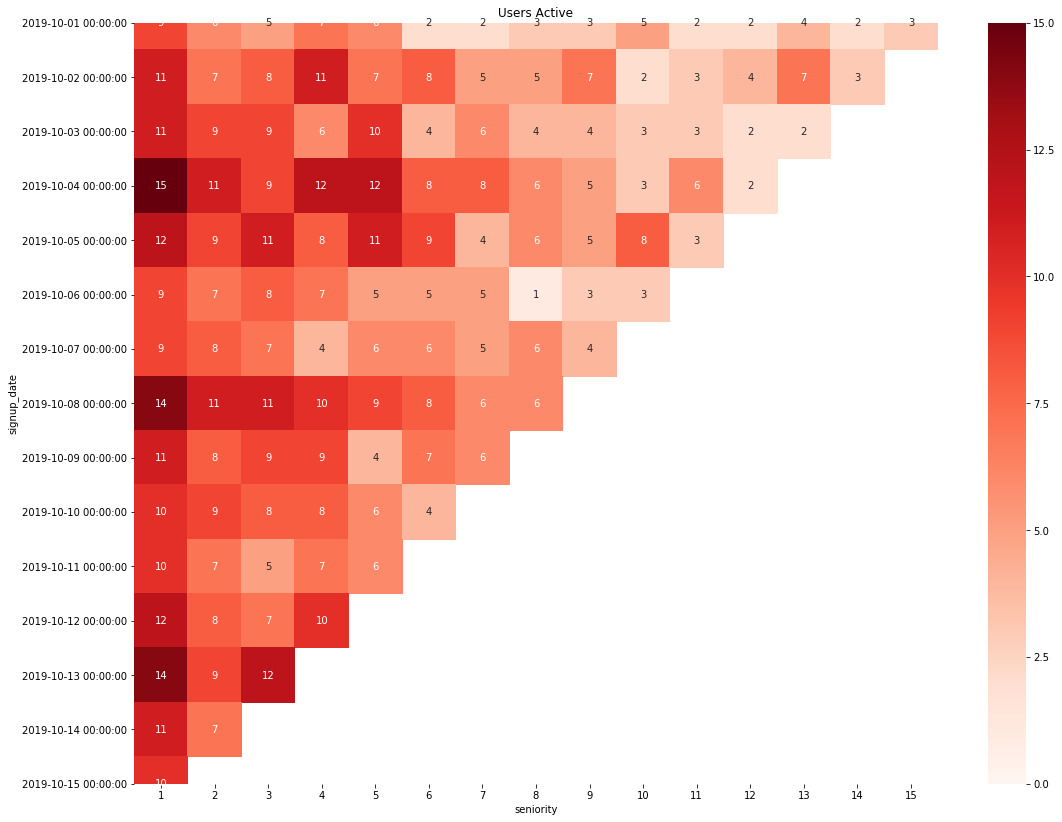

In [6]:
# User Count heatmap
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts1, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts1.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()

The percentage is nothing less than the number of active users from the same cohort 
in a day, divided by the number of users the cohort started with on day 1

In [7]:
# We need the base for our retention rate calculation
# Here we just take the first column of cohort_counts
base = cohort_counts1[1]
# And now we apply the divide method to our cohort_counts, dividing it by the base
retention = cohort_counts1.divide(base, axis=0).round(3)
retention

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.556,0.778,0.667,0.222,0.222,0.333,0.333,0.556,0.222,0.222,0.444,0.222,0.333
2019-10-02,1.0,0.636,0.727,1.000,0.636,0.727,0.455,0.455,0.636,0.182,0.273,0.364,0.636,0.273,NaN
2019-10-03,1.0,0.818,0.818,0.545,0.909,0.364,0.545,0.364,0.364,0.273,0.273,0.182,0.182,NaN,NaN
2019-10-04,1.0,0.733,0.600,0.800,0.800,0.533,0.533,0.400,0.333,0.200,0.400,0.133,NaN,NaN,NaN
2019-10-05,1.0,0.750,0.917,0.667,0.917,0.750,0.333,0.500,0.417,0.667,0.250,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.778,0.889,0.778,0.556,0.556,0.556,0.111,0.333,0.333,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.889,0.778,0.444,0.667,0.667,0.556,0.667,0.444,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.786,0.786,0.714,0.643,0.571,0.429,0.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.727,0.818,0.818,0.364,0.636,0.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


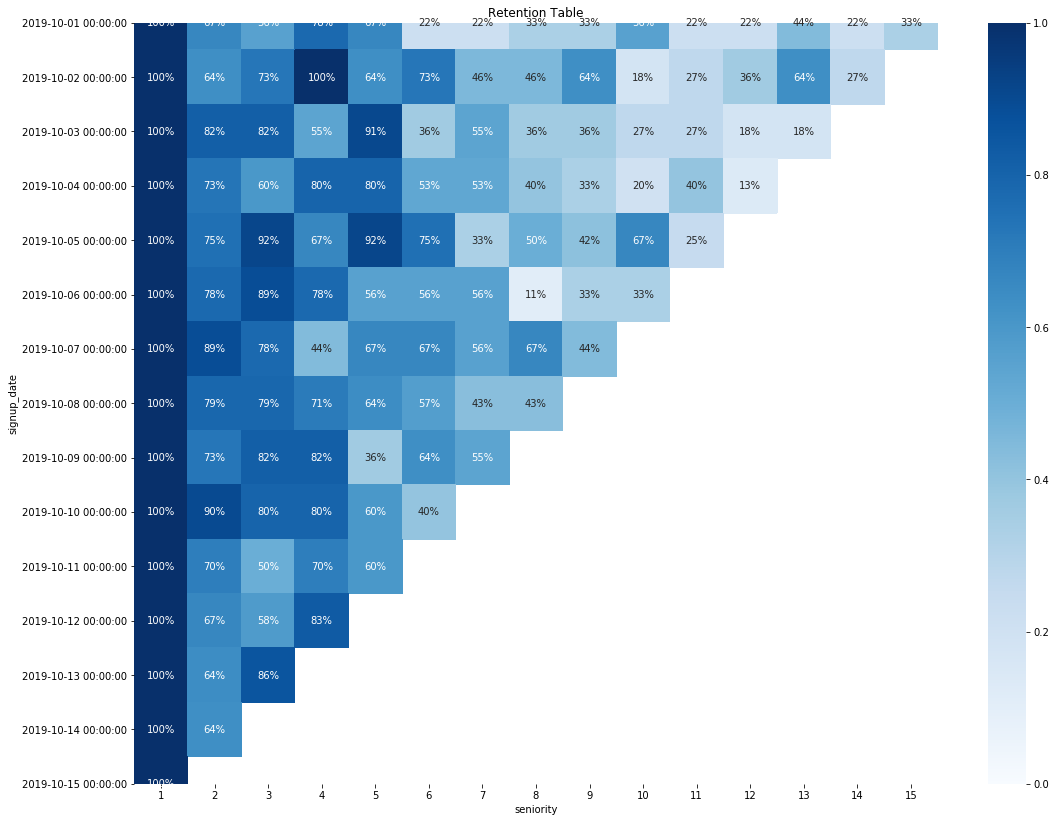

In [8]:
# Retention Rate heatmap
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Blues')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()

To visualize the active users over time based on amount of maney they spend

In [9]:
group2 = df.groupby(['money', 'time'])
cohort_data2 = group2['username'].size()         
cohort_data2 = cohort_data2.reset_index()
cohort_data2

,money,time,username
0,0,0,13
1,0,1,4
2,0,2,5
3,0,3,5
4,0,4,6
...,...,...,...
357,3,115,1
358,3,127,1
359,3,132,2
360,3,162,1


In [10]:
cohort_counts2 = cohort_data2.pivot(index='money', columns='time', values='username')
cohort_counts2

time,0,1,2,3,4,5,6,7,8,9,...,177,178,183,188,190,192,195,206,208,210
money,,,,,,,,,,,,,,,,,,,,,
0,13.0,4.0,5.0,5.0,6.0,1.0,4.0,3.0,6.0,2.0,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
1,10.0,5.0,4.0,9.0,5.0,7.0,1.0,1.0,2.0,6.0,...,2.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
2,6.0,NaN,1.0,3.0,7.0,3.0,4.0,2.0,2.0,3.0,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cohort_counts2 = cohort_counts2.dropna(thresh=3, axis=1) # droping columns with maximum 3 NaN values
cohort_counts2

time,0,2,3,4,5,6,7,8,9,10,...,82,84,89,95,106,109,112,120,126,133
money,,,,,,,,,,,,,,,,,,,,,
0,13.0,5.0,5.0,6.0,1.0,4.0,3.0,6.0,2.0,2.0,...,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0
1,10.0,4.0,9.0,5.0,7.0,1.0,1.0,2.0,6.0,3.0,...,3.0,1.0,NaN,1.0,1.0,2.0,NaN,2.0,1.0,1.0
2,6.0,1.0,3.0,7.0,3.0,4.0,2.0,2.0,3.0,NaN,...,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
3,2.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


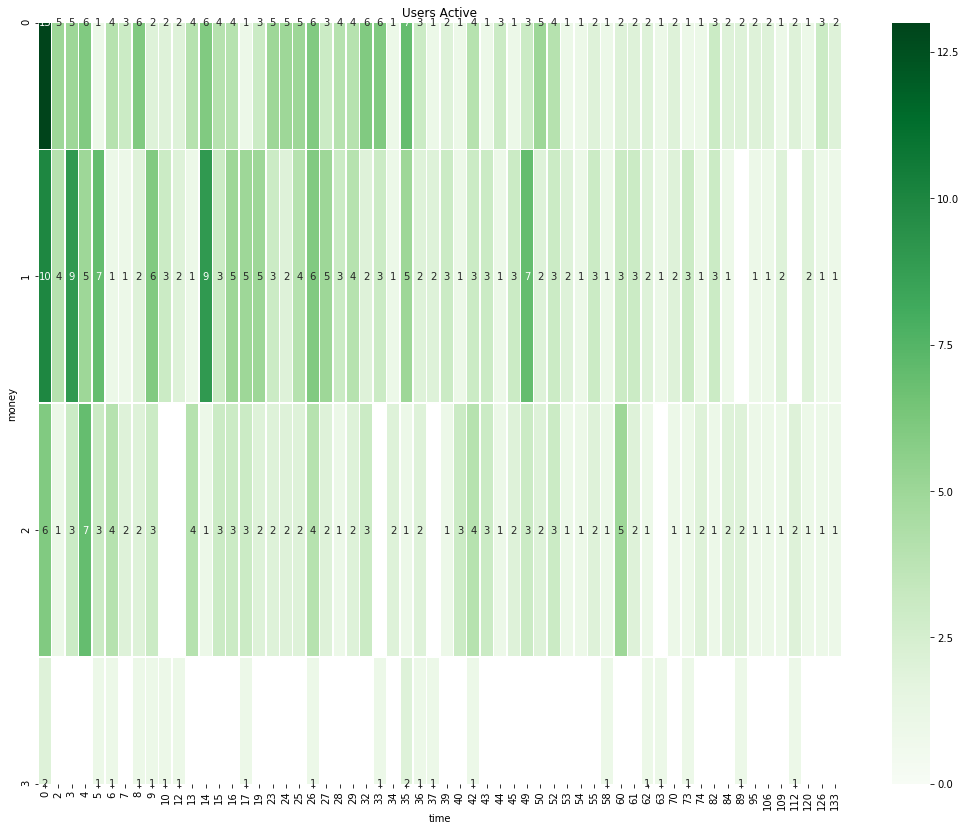

In [17]:
# User Count heatmap
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts2, annot=True, vmin=0.0,cmap='Greens',linewidths=.5)#,square=True)
ax.set_yticklabels(cohort_counts2.index)
fig=ax.get_figure()
fig.savefig("time spent count moneywise.png")

plt.show()

To visualize number of active users spending time, country wise

In [13]:
group3 = df.groupby(['country', 'time'])
cohort_data3 = group3['username'].size()         
cohort_data3 = cohort_data3.reset_index()
cohort_data3

,country,time,username
0,Brazil,0,7
1,Brazil,1,5
2,Brazil,2,4
3,Brazil,3,7
4,Brazil,4,3
...,...,...,...
415,United States,176,1
416,United States,188,1
417,United States,190,1
418,United States,206,1


In [14]:
cohort_counts3 = cohort_data3.pivot(index='country', columns='time', values='username')
cohort_counts3.head()

time,0,1,2,3,4,5,6,7,8,9,...,177,178,183,188,190,192,195,206,208,210
country,,,,,,,,,,,,,,,,,,,,,
Brazil,7.0,5.0,4.0,7.0,3.0,2.0,1.0,3.0,2.0,4.0,...,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN
Canada,7.0,1.0,2.0,4.0,7.0,2.0,4.0,2.0,6.0,6.0,...,3.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
Mexico,12.0,2.0,2.0,2.0,6.0,3.0,3.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,5.0,1.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,1.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN


In [15]:
cohort_counts3 = cohort_counts3.dropna(thresh=4, axis=1) # droping columns with 4 NaN values
cohort_counts3.head()

time,0,1,2,3,4,5,6,8,9,10,...,49,60,61,66,68,72,80,89,96,144
country,,,,,,,,,,,,,,,,,,,,,
Brazil,7.0,5.0,4.0,7.0,3.0,2.0,1.0,2.0,4.0,1.0,...,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0
Canada,7.0,1.0,2.0,4.0,7.0,2.0,4.0,6.0,6.0,1.0,...,8.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0
Mexico,12.0,2.0,2.0,2.0,6.0,3.0,3.0,1.0,1.0,1.0,...,2.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
United States,5.0,1.0,2.0,4.0,2.0,5.0,2.0,2.0,1.0,3.0,...,2.0,5.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0


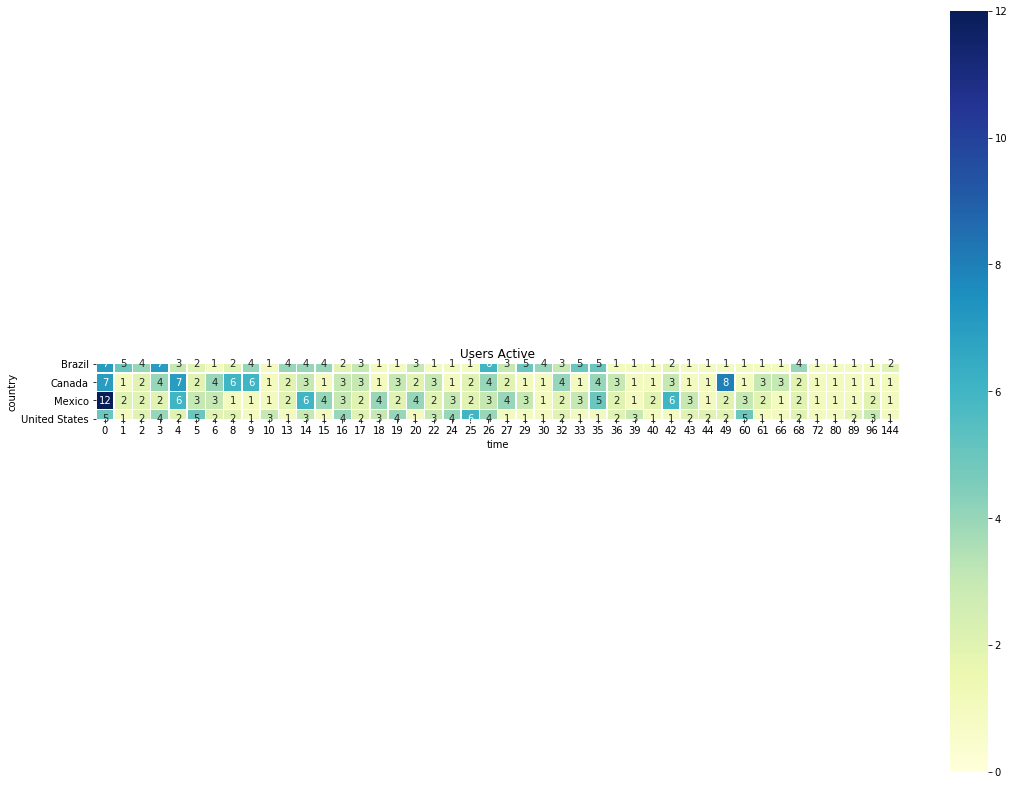

In [16]:
# User Count heatmap
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts3, annot=True,linewidths=.5, vmin=0.0,cmap='YlGnBu',square=True)
ax.set_yticklabels(cohort_counts3.index)
fig=ax.get_figure()
fig.savefig("time spent count countrywise.png")

plt.show()

To visualize number of active users spending money, country wise

In [18]:
group4 = df.groupby(['country', 'money'])
cohort_data4 = group4['username'].size()         
cohort_data4 = cohort_data4.reset_index()
cohort_data4

,country,money,username
0,Brazil,0,83
1,Brazil,1,88
2,Brazil,2,42
3,Brazil,3,8
4,Canada,0,67
5,Canada,1,94
6,Canada,2,44
7,Canada,3,6
8,Mexico,0,81
9,Mexico,1,69


In [19]:
cohort_counts4 = cohort_data4.pivot(index='country', columns='money', values='username')
cohort_counts4.head()

money,0,1,2,3
country,,,,
Brazil,83,88,42,8
Canada,67,94,44,6
Mexico,81,69,40,16
United States,65,67,46,6


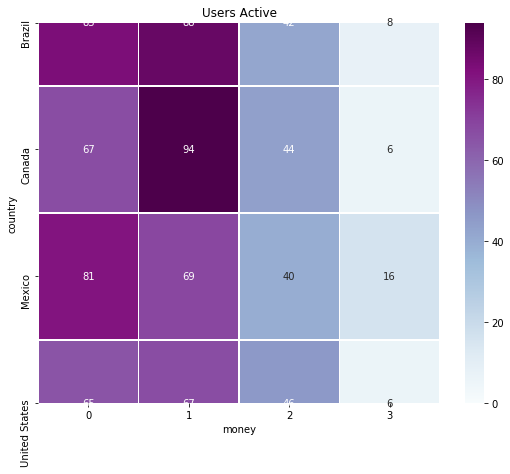

In [20]:
# User Count heatmap
plt.figure(figsize=(9,7))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts4, annot=True,linewidths=.5, vmin=0.0,cmap='BuPu')#,square=True)
ax.set_yticklabels(cohort_counts4.index)
fig=ax.get_figure()
fig.savefig("money spent count countrywise.png")

plt.show()

# preprocessing 

In [4]:
df

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada
...,...,...,...,...,...,...
817,U10163,15/10/2019,15/10/2019,0,153,Brazil
818,U10164,15/10/2019,15/10/2019,1,50,United States
819,U10165,15/10/2019,15/10/2019,2,96,United States
820,U10166,15/10/2019,15/10/2019,1,49,Canada


In [5]:
group = df.groupby('username')
group.head()

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada
...,...,...,...,...,...,...
817,U10163,15/10/2019,15/10/2019,0,153,Brazil
818,U10164,15/10/2019,15/10/2019,1,50,United States
819,U10165,15/10/2019,15/10/2019,2,96,United States
820,U10166,15/10/2019,15/10/2019,1,49,Canada


In [6]:
count = 0
df1 = pd.DataFrame()
T = dt.datetime(2050, 1, 1, 0, 0)
df[['signup_date','ref_date']] = df[['signup_date','ref_date']].astype('datetime64[ns]')

for i,j in group:
    count += 1
    if count % 7 == 0:
        j['churn_date'] = j['signup_date'] + dt.timedelta(days=332)
        
    elif count % 9 == 0:
        j['churn_date'] = j['signup_date'] + dt.timedelta(days=557)
        
    elif count % 11 == 0:
        j['churn_date'] = j['signup_date'] + dt.timedelta(days=786)
        
    elif count % 13 == 0:
        j['churn_date'] = j['signup_date'] + dt.timedelta(days=871)
        
    elif count % 17 == 0 or count % 19 == 0:
        j['churn_date'] = j['signup_date'] + dt.timedelta(days=987)
        
    elif count % 23 == 0 or count % 27 == 0 or count % 29 == 0:
        j['churn_date'] = j['signup_date'] + dt.timedelta(days=1001)
        
    else:
        j['churn_date'] = T 
        
    
    df1 = pd.concat([df1, j], axis=0) 

    

In [7]:
df1['churn'] = 0
for i in range(len(df1)):
    if df1['churn_date'].iloc[i] == T:
        df1['churn'][i] = 0
    else:
        df1['churn'][i] = 1


In [8]:
df1.churn.value_counts()

1    446
0    376
Name: churn, dtype: int64

In [9]:
def convert_date_to_ordinal(date):
    return date.toordinal()
for i in range(len(df1)):
    df1['signup_date'].iloc[i] = convert_date_to_ordinal(df1['signup_date'].iloc[i])
    df1['ref_date'].iloc[i] = convert_date_to_ordinal(df1['ref_date'].iloc[i])
    df1['churn_date'].iloc[i] = convert_date_to_ordinal(df1['churn_date'].iloc[i])
    
df1 = df1.astype({'signup_date':'int64', 'ref_date':'int64', 'churn_date':'int64'})

In [10]:
df1.head()

,username,signup_date,ref_date,money,time,country,churn_date,churn
0,U10000,737069,737069,2,89,Canada,748383,0
1,U10000,737069,737250,0,35,Canada,748383,0
2,U10000,737069,737312,2,4,Canada,748383,0
3,U10000,737069,737342,1,5,Canada,748383,0
4,U10000,737069,737403,1,17,Canada,748383,0


# Building a Model With CatBoost Library

Splitting the dataset in train and test to build a model

In [11]:
X1 = df1.drop(['username','churn_date', 'churn'], 1)
y1 = df1['churn']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

In [14]:
from catboost import CatBoostClassifier, Pool

# build a model using CatBoost Library

model = CatBoostClassifier(iterations=500,
                           learning_rate=0.75,
                           depth=5,
                           loss_function = "CrossEntropy", 
                           train_dir = "crossentropy")

cat_features = np.where(X1.dtypes != np.int64)[0]
# Fit model
model.fit(X_train1, y_train1, cat_features,eval_set=(X_test1, y_test1), plot=True, verbose=False)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [27]:
import pickle
mod = '\home\sandynote\Desktop\Intern task\modelfile.pkl'
with open(mod, 'wb') as file:
    pickle.dump(model,file)

print("model created")

model created


In [15]:
# Get predicted classes
train_pred1 = model.predict(X_train1)
test_pred1 = model.predict(X_test1)

train_acc1 = accuracy_score(train_pred1, y_train1)
test_acc1 = accuracy_score(test_pred1, y_test1)

print("Train accuracy : " + str(train_acc1))
print("Test accuracy : " + str(test_acc1))

Train accuracy : 0.7848443843031123
Test accuracy : 0.7108433734939759


In [16]:
con_matrix1 = confusion_matrix(test_pred1, y_test1)
print("confusion_matrix : \n" + str(con_matrix1))

#Precision tells us how many of the correctly predicted cases actually turned out to be positive
precision1 = con_matrix1[0][0] / (con_matrix1[0][0] + con_matrix1[0][1])
print("precision : " + str(precision1))

#Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
Recall1 = con_matrix1[0][0] / (con_matrix1[0][0] + con_matrix1[1][0])
print("Recall : " + str(Recall1))

#F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. 
#It is maximum when Precision is equal to Recall.
f1_score1 = 2 * Recall1 * precision1 / (Recall1 + precision1)
print("f1_score : " + str(f1_score1))

confusion_matrix : 
[[30 11]
 [13 29]]
precision : 0.7317073170731707
Recall : 0.6976744186046512
f1_score : 0.7142857142857143


# using svm to build a model

In [17]:
df1

,username,signup_date,ref_date,money,time,country,churn_date,churn
0,U10000,737069,737069,2,89,Canada,748383,0
1,U10000,737069,737250,0,35,Canada,748383,0
2,U10000,737069,737312,2,4,Canada,748383,0
3,U10000,737069,737342,1,5,Canada,748383,0
4,U10000,737069,737403,1,17,Canada,748383,0
...,...,...,...,...,...,...,...,...
817,U10163,737347,737347,0,153,Brazil,748383,0
818,U10164,737347,737347,1,50,United States,738133,1
819,U10165,737347,737347,2,96,United States,748383,0
820,U10166,737347,737347,1,49,Canada,748383,0


In [18]:
Country = pd.get_dummies(df1.country)
Country.head()

,Brazil,Canada,Mexico,United States
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [19]:
df2 = pd.concat([df1,Country], axis=1)
df2

,username,signup_date,ref_date,money,time,country,churn_date,churn,Brazil,Canada,Mexico,United States
0,U10000,737069,737069,2,89,Canada,748383,0,0,1,0,0
1,U10000,737069,737250,0,35,Canada,748383,0,0,1,0,0
2,U10000,737069,737312,2,4,Canada,748383,0,0,1,0,0
3,U10000,737069,737342,1,5,Canada,748383,0,0,1,0,0
4,U10000,737069,737403,1,17,Canada,748383,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
817,U10163,737347,737347,0,153,Brazil,748383,0,1,0,0,0
818,U10164,737347,737347,1,50,United States,738133,1,0,0,0,1
819,U10165,737347,737347,2,96,United States,748383,0,0,0,0,1
820,U10166,737347,737347,1,49,Canada,748383,0,0,1,0,0


In [20]:
X2 = df2.drop(['username','country','churn_date', 'churn'], 1)
y2 = df2['churn']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=42)


In [23]:
from sklearn import svm

# build a model using svm
clf = svm.SVC(kernel='rbf', C=0.1, gamma=1.0)

# fit a model
clf.fit(X_train2, y_train2)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# Get predicted classes
train_pred2 = clf.predict(X_train2)
test_pred2 = clf.predict(X_test2)

train_acc2 = accuracy_score(train_pred2, y_train2)
test_acc2 = accuracy_score(test_pred2, y_test2)

print("Train accuracy : " + str(train_acc2))
print("Test accuracy : " + str(test_acc2))
print("\n")
print(classification_report(y_test2, test_pred2))

Train accuracy : 0.5493910690121786
Test accuracy : 0.4819277108433735


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.48      1.00      0.65        40

    accuracy                           0.48        83
   macro avg       0.24      0.50      0.33        83
weighted avg       0.23      0.48      0.31        83



In [25]:
con_matrix2 = confusion_matrix(test_pred2, y_test2)
print("confusion_matrix : \n" + str(con_matrix2))

#Precision tells us how many of the correctly predicted cases actually turned out to be positive
precision2 = con_matrix2[0][0] / (con_matrix2[0][0] + con_matrix2[0][1])
print("precision : " + str(precision2))

#Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
Recall2 = con_matrix2[0][0] / (con_matrix2[0][0] + con_matrix2[1][0])
print("Recall : " + str(Recall2))

#F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. 
#It is maximum when Precision is equal to Recall.
f1_score2 = 2 * Recall2 * precision2 / (Recall2 + precision2)
print("f1_score : " + str(f1_score2))

confusion_matrix : 
[[ 0  0]
 [43 40]]
precision : nan
Recall : 0.0
f1_score : nan


# GridSearchCV

One of the great things about GridSearch is that it is a meta estimator. It takes an estimator like SVC and creates a new estimator that behaves exactly the same in this case, like a classifier. Add refit=True and choose verbose to whatever number you want, higher the number, more the verbose (verbose just means the text output describing the process)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}#,'poly']}#,'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

grid.fit(X_train2, y_train2)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.551, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.522, total=   0.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................


In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [31]:
# Get predicted classes
train_pred3 = grid.predict(X_train2)
test_pred3 = grid.predict(X_test2)

train_acc3 = accuracy_score(train_pred3, y_train2)
test_acc3 = accuracy_score(test_pred3, y_test2)

print("Train accuracy : " + str(train_acc3))
print("Test accuracy : " + str(test_acc3))

# print classification report
print(classification_report(y_test2, test_pred3))

0.8145454545454546
0.6029411764705882
